In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

## EDA
---
* Formes is 68 x 8, small dataset may only use SVC
* target value: profile, binarized value
* data cols: Unnamed: 0?, Meter?, In_area, Customer, Area, X, Y, Profile
* dtypes: int and float values
* NaN values: aucun
* Profile value counts: 9 Enterprises, 59 households
---
### Remarks
* Look for geographical positions (X, y)
* Look the corr matrix
* What Customer col means?
* What Meter col means? Height of batiment?
* What Unnamed: 0 col means?
* Why ur professor gives no explanations about columns naxuy?


In [2]:
data = pd.read_csv('/kaggle/input/gisnocs/GIS.csv')
df = data.copy()
df

,Unnamed: 0,Meter,In_area,Customer,Area,X,Y,Profile
0,1,26,1,0,353.584439,869610.066374,9.687255e+06,1
1,2,30,1,1,46.146436,869648.561937,9.687263e+06,0
2,3,40,1,1,93.449724,869399.366136,9.687110e+06,1
3,5,26,1,1,146.721462,869583.878465,9.687283e+06,1
4,6,1,1,1,96.945468,869344.634093,9.687074e+06,0
...,...,...,...,...,...,...,...,...
63,223,60,1,1,56.615509,869072.209931,9.687008e+06,0
64,229,5,1,1,10.991904,869500.472185,9.687191e+06,1
65,230,59,1,1,9.782326,869300.165234,9.687097e+06,0
66,231,53,1,1,6.876569,869296.124304,9.687094e+06,0


In [3]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  68 non-null     int64  
 1   Meter       68 non-null     int64  
 2   In_area     68 non-null     int64  
 3   Customer    68 non-null     int64  
 4   Area        68 non-null     float64
 5   X           68 non-null     float64
 6   Y           68 non-null     float64
 7   Profile     68 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 4.4 KB
None


,Unnamed: 0,Meter,In_area,Customer,Area,X,Y,Profile
count,68.000000,68.000000,68.0,68.000000,68.000000,68.000000,6.800000e+01,68.000000
mean,98.161765,29.985294,1.0,0.897059,83.841902,869335.283109,9.687101e+06,0.132353
std,68.852559,18.070750,0.0,0.306141,66.026392,126.340566,9.652992e+01,0.341394
min,1.000000,1.000000,1.0,0.000000,6.876569,869072.209931,9.686811e+06,0.000000
25%,37.000000,15.750000,1.0,1.000000,40.074858,869252.626450,9.687053e+06,0.000000
50%,92.500000,28.000000,1.0,1.000000,70.274567,869320.070148,9.687102e+06,0.000000
75%,142.250000,44.250000,1.0,1.000000,108.540796,869396.066568,9.687168e+06,0.000000
max,236.000000,63.000000,1.0,1.000000,353.584439,869648.561937,9.687283e+06,1.000000


In [4]:
# We don't need In_area, it gives 0 information about data
# Unnamed: 0 is triggering, there are no explanations
df.drop('In_area', axis=1, inplace=True)
df

,Unnamed: 0,Meter,Customer,Area,X,Y,Profile
0,1,26,0,353.584439,869610.066374,9.687255e+06,1
1,2,30,1,46.146436,869648.561937,9.687263e+06,0
2,3,40,1,93.449724,869399.366136,9.687110e+06,1
3,5,26,1,146.721462,869583.878465,9.687283e+06,1
4,6,1,1,96.945468,869344.634093,9.687074e+06,0
...,...,...,...,...,...,...,...
63,223,60,1,56.615509,869072.209931,9.687008e+06,0
64,229,5,1,10.991904,869500.472185,9.687191e+06,1
65,230,59,1,9.782326,869300.165234,9.687097e+06,0
66,231,53,1,6.876569,869296.124304,9.687094e+06,0


value count of Profile
 0    59
1     9
Name: Profile, dtype: int64
value count of Customer
 1    61
0     7
Name: Customer, dtype: int64
A value of 0.1323529411764706 means the dataset is balanced:


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Meter'}>],
       [<AxesSubplot:title={'center':'Customer'}>,
        <AxesSubplot:title={'center':'Profile'}>]], dtype=object)

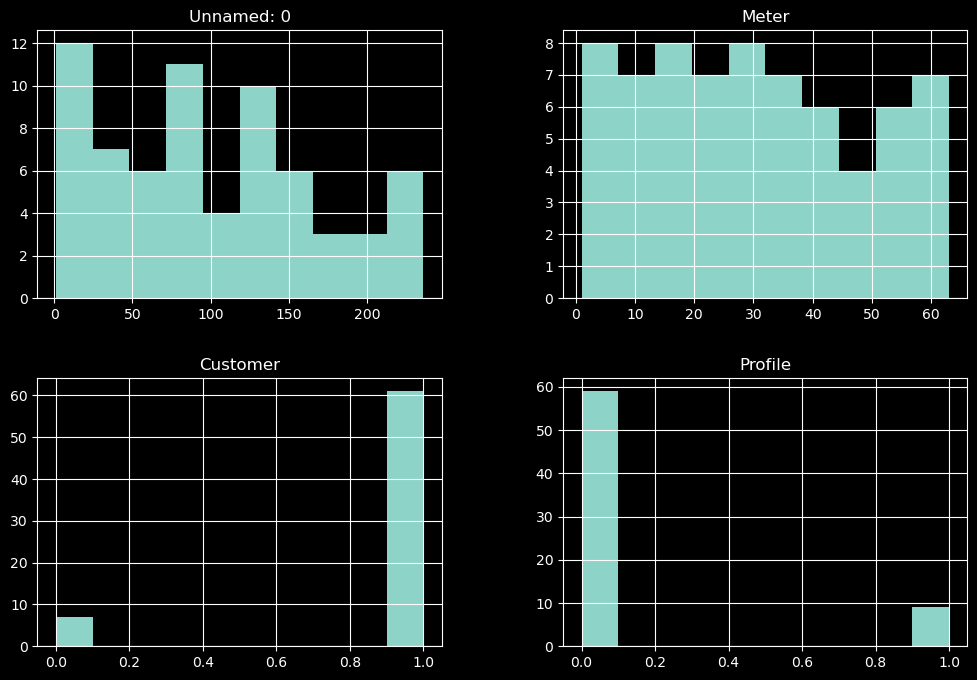

In [5]:
# More Analysis
print('value count of Profile\n', df.loc[:, 'Profile'].value_counts()) # => ccl sent in EDA
print('value count of Customer\n', df.loc[:, 'Customer'].value_counts()) # => 
print(f'A value of {9/68} means the dataset is balanced:')
df.select_dtypes('int').hist(figsize=(12, 8))

<AxesSubplot:>

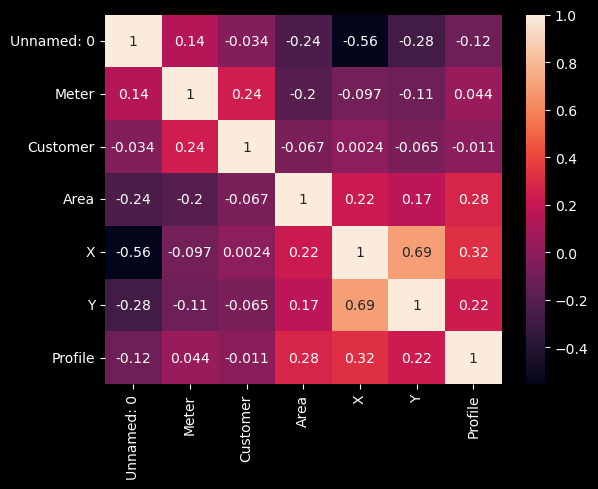

In [6]:
sns.heatmap(df.corr(), annot=True) # Logically enough, Profile depends highly on Area
# On the other hand, we still don't know what 'Unnamed: 0' and 'Meter' or 'Customer' columns are. BTW the corr between Customer, Meter and Profile 
# is extremly low, and we may be pushed to do feature engineering  

<AxesSubplot:xlabel='X', ylabel='Y'>

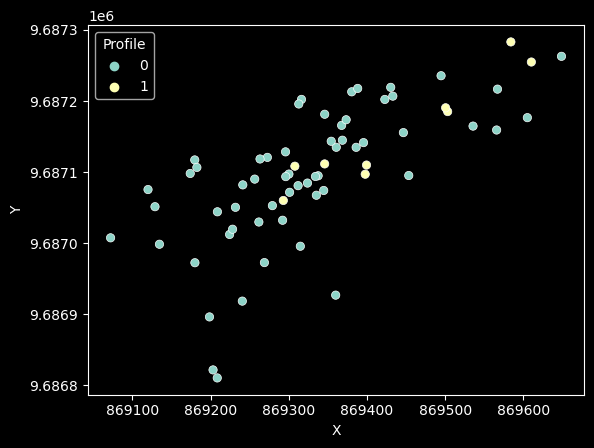

In [7]:
sns.scatterplot(data=df, x='X', y='Y', hue='Profile') # Is tha map of the village, the betweenprises tend to be more in Center + North-East

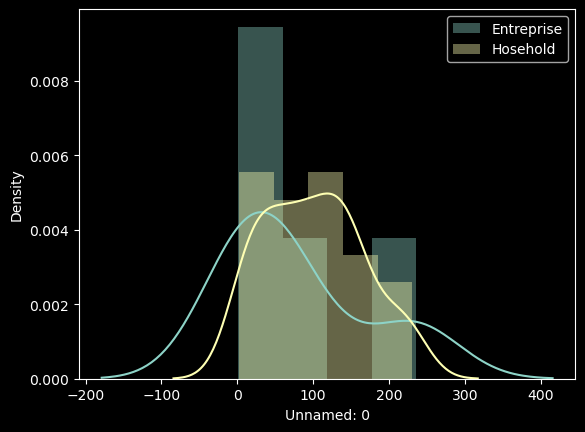

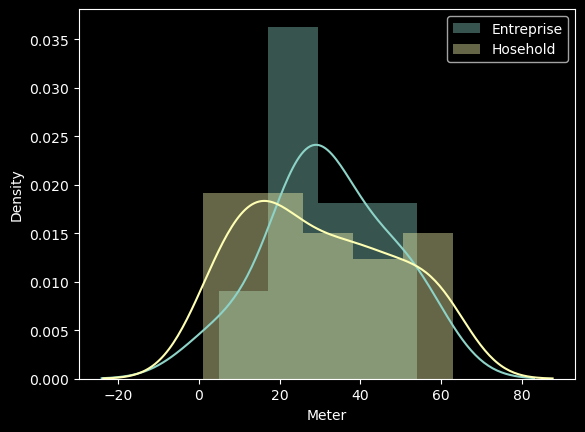

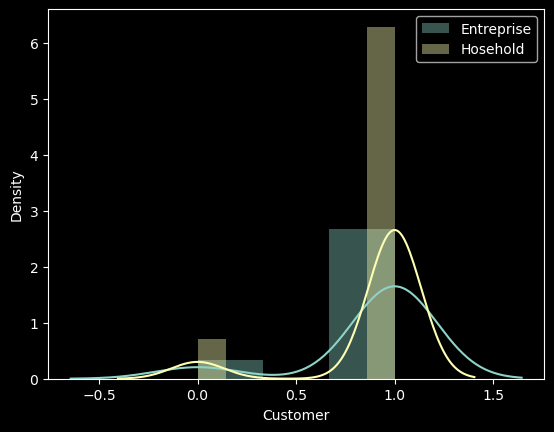

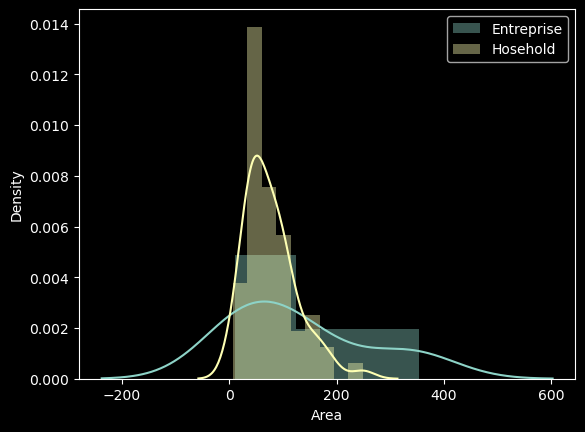

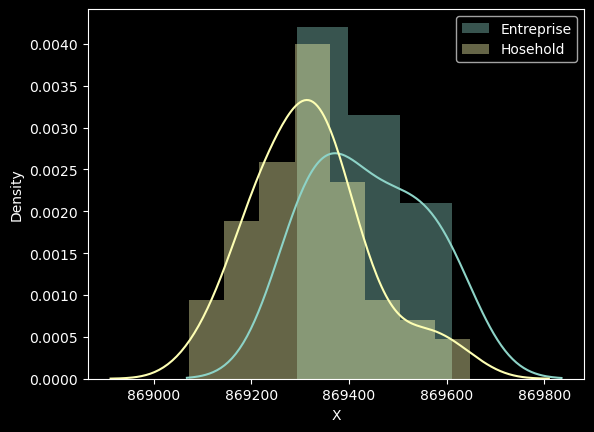

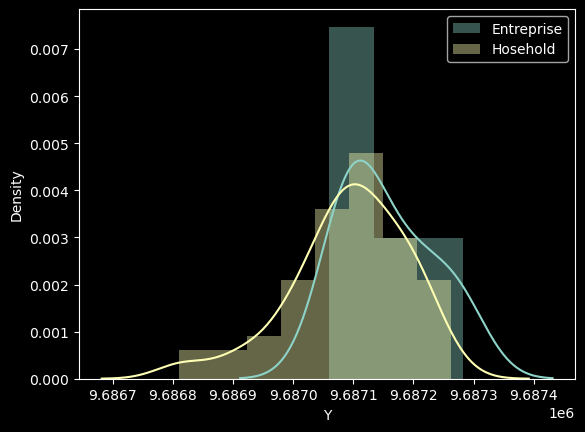

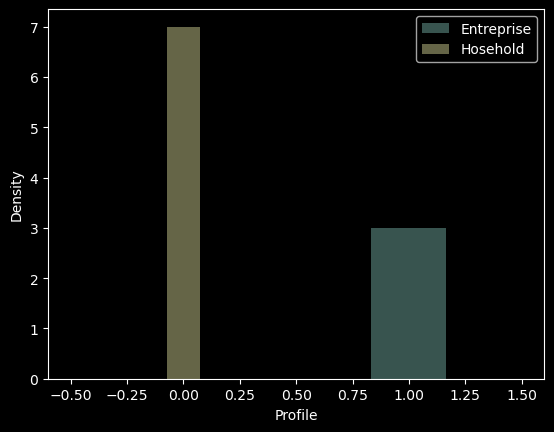

In [8]:
for col in df.columns:
    plt.figure()
    sns.distplot(df[df['Profile'] == 1][col], label='Entreprise')
    sns.distplot(df[df['Profile'] == 0][col], label='Hosehold')
    plt.legend()

In [9]:
# The graphics below give no additional info because both cqtegories are collé un à l'autre   
# Due to lack of data, the pattern analysis doesn't give a clear idea of which is what
# Assumption 1: 'Meter' columns refers to the hight?
# creating a new col
df['volume'] = df['Area'] * df['Meter']
df

,Unnamed: 0,Meter,Customer,Area,X,Y,Profile,volume
0,1,26,0,353.584439,869610.066374,9.687255e+06,1,9193.195406
1,2,30,1,46.146436,869648.561937,9.687263e+06,0,1384.393080
2,3,40,1,93.449724,869399.366136,9.687110e+06,1,3737.988954
3,5,26,1,146.721462,869583.878465,9.687283e+06,1,3814.758015
4,6,1,1,96.945468,869344.634093,9.687074e+06,0,96.945468
...,...,...,...,...,...,...,...,...
63,223,60,1,56.615509,869072.209931,9.687008e+06,0,3396.930535
64,229,5,1,10.991904,869500.472185,9.687191e+06,1,54.959522
65,230,59,1,9.782326,869300.165234,9.687097e+06,0,577.157258
66,231,53,1,6.876569,869296.124304,9.687094e+06,0,364.458152


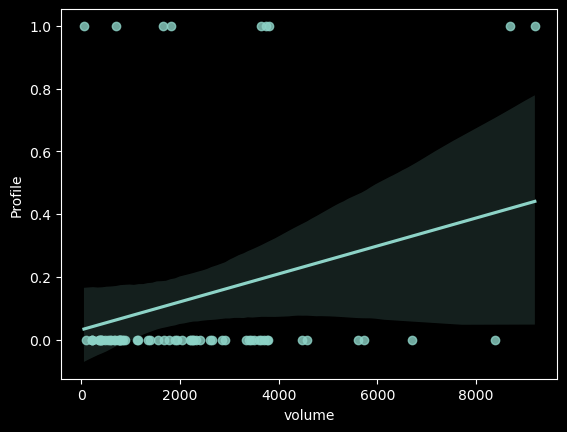

In [10]:
sns.regplot(data=df, x='volume', y='Profile') # lriv xuyna, Assumption 1 est à vomir quoi
df = df.drop('volume', axis=1)

<AxesSubplot:xlabel='Customer', ylabel='Profile'>

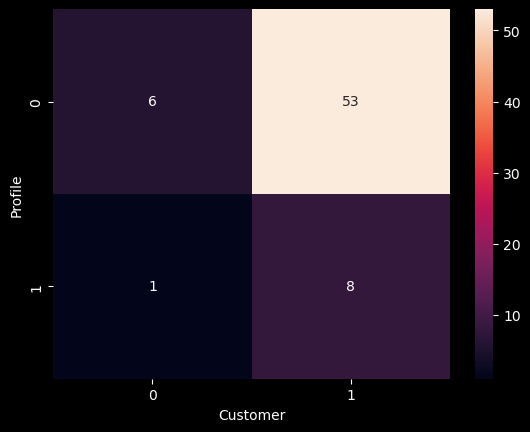

In [11]:
sns.heatmap(pd.crosstab(df['Profile'], df['Customer']), annot=True, fmt='d') # => if the profile says it is a household, they are mostly Customer 

In [12]:
df['X'] = df.loc[:, 'X']/ df.loc[:, 'X'].max()
df['Y'] = df.loc[:, 'Y']/ df.loc[:, 'Y'].max()
df['Area'] = df.loc[:, 'Area']/ df.loc[:, 'Area'].max()
df

,Unnamed: 0,Meter,Customer,Area,X,Y,Profile
0,1,26,0,1.000000,0.999956,0.999997,1
1,2,30,1,0.130510,1.000000,0.999998,0
2,3,40,1,0.264293,0.999713,0.999982,1
3,5,26,1,0.414955,0.999926,1.000000,1
4,6,1,1,0.274179,0.999651,0.999978,0
...,...,...,...,...,...,...,...
63,223,60,1,0.160119,0.999337,0.999972,0
64,229,5,1,0.031087,0.999830,0.999990,1
65,230,59,1,0.027666,0.999599,0.999981,0
66,231,53,1,0.019448,0.999595,0.999980,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X = df.drop('Profile', axis=1)
y = df['Profile']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

model_gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
model_gbc.fit(X_train, y_train)

model_log = LogisticRegression(random_state=0)
model_log.fit(X_train, y_train)

model_rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
model_rf.fit(X_train, y_train)

model_svm = SVC(kernel='linear')
model_svm.fit(X_train, y_train)

models = {
    'SVM': model_svm,
    'LogReg': model_log,
    'GradientBoost': model_gbc,
    'RandomForest': model_rf
}

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

def print_model_output(model, X_validation, y_validation):
    print(classification_report(y_validation, model.predict(X_validation), target_names=['Entreprise', 'Households']))
    y_pred = model.predict(X_validation)
    p_cases = len(y_validation[y_validation == 0])
    n_cases = len(y_validation[y_validation == 1])
    print(f'Holmes total quantity: {len(y_validation)}')
    print(f'Household cases: {p_cases}, predicted: {confusion_matrix(y_validation, y_pred)[0][0]} true households and {confusion_matrix(y_validation, y_pred)[0][1]} false households')
    print(f'Entreprise cases: {n_cases}, predicted: {confusion_matrix(y_validation, y_pred)[1][0]} false Entreprise and {confusion_matrix(y_validation, y_pred)[1][1]} true Entreprise')
    
for k, v in models.items():
    print('______________________________________________________')
    print(f'{k} model Results are:')
    print_model_output(v, X_test, y_test)

______________________________________________________
SVM model Results are:
              precision    recall  f1-score   support

  Entreprise       0.90      1.00      0.95        19
  Households       0.00      0.00      0.00         2

    accuracy                           0.90        21
   macro avg       0.45      0.50      0.48        21
weighted avg       0.82      0.90      0.86        21

Holmes total quantity: 21
Household cases: 19, predicted: 19 true households and 0 false households
Entreprise cases: 2, predicted: 2 false Entreprise and 0 true Entreprise
______________________________________________________
LogReg model Results are:
              precision    recall  f1-score   support

  Entreprise       0.90      1.00      0.95        19
  Households       0.00      0.00      0.00         2

    accuracy                           0.90        21
   macro avg       0.45      0.50      0.48        21
weighted avg       0.82      0.90      0.86        21

Holmes total q

# SAME TUFTA RESULTS EVERYWHERE THANKS TO TUFTA DASATU BECAUSE WE CANT DO NONE BC OF HIS QYAL COLUMN NAMES